类别标签: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
数据集描述: .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.fea

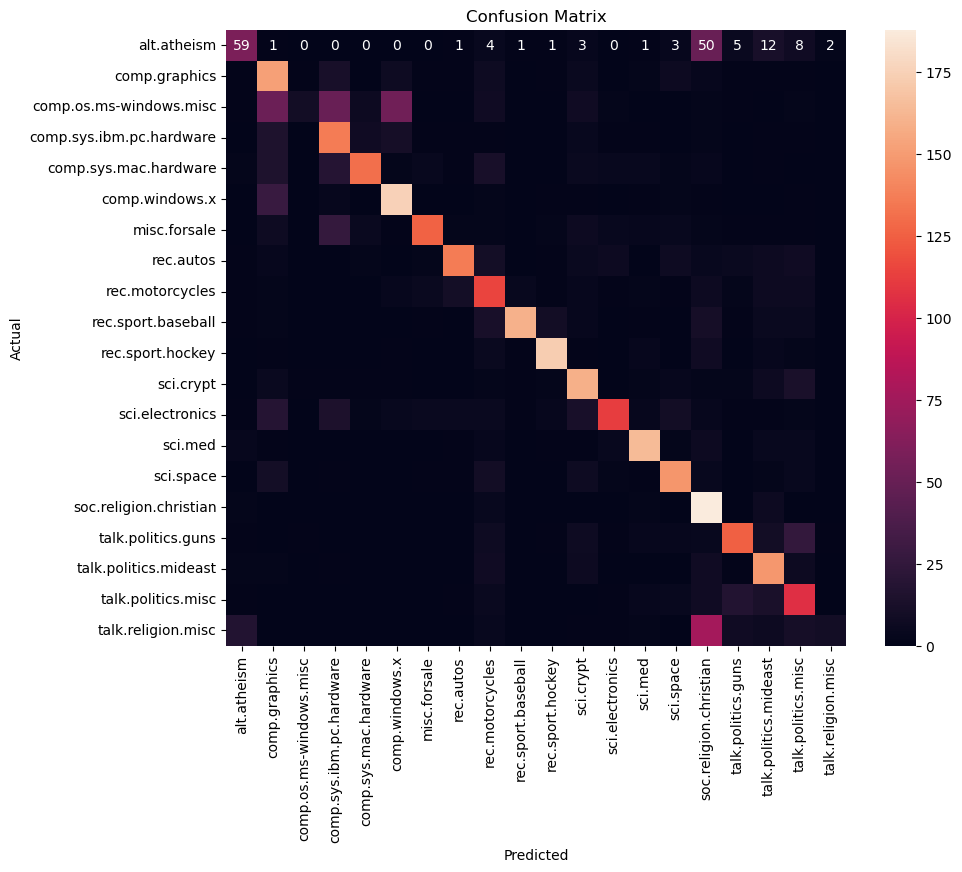

In [2]:
# 加载20新闻组数据集
# fetch_20newsgroups函数用于加载20新闻组数据集，subset='all'表示加载全部数据
# remove参数用于移除邮件头部、尾部和引用部分
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# 查看类别标签
# target_names属性包含了数据集中所有类别的名称
print("类别标签:", newsgroups.target_names)
# 查看数据集的描述
# DESCR属性提供了数据集的描述
print("数据集描述:", newsgroups.DESCR)
# 查看前5个数据样本
print("数据样本:")
for i in range(5):
    print(newsgroups.data[i])
    print()

# 将文本数据转换为词袋模型
# CountVectorizer用于将文本数据转换为词袋模型，stop_words='english'表示去除英文停用词
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data) # 转换数据集
Y = newsgroups.target # 标签数据

# 划分数据集，训练集比例为0.2，随机种子为42
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 创建并训练朴素贝叶斯分类器
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, Y_train)

# 使用训练好的模型进行预测
Y_pred = nb_classifier.predict(X_test)

# 评估模型效果
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
# Accuracy: 准确率，预测正确的样本占总样本的比例
accuracy = accuracy_score(Y_test, Y_pred)
# Recall: 召回率，针对每个类别，预测为该类别的样本中实际为该类别的比例
recall = recall_score(Y_test, Y_pred, average='macro')  # 'macro'平均值不考虑类别不平衡
# F1 Score: F1分数，准确率和召回率的调和平均数
f1 = f1_score(Y_test, Y_pred, average='macro')

# 打印评估结果
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix: 混淆矩阵，显示实际类别与预测类别的关系
conf_matrix = confusion_matrix(Y_test, Y_pred)
# 画出混淆矩阵
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()





